In [13]:
import matplotlib.pyplot as plt
import numpy as np

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_process import ArmaProcess
import statsmodels.api as sm

In [14]:
ar_params = np.array([0.96])
ma_params = np.array([])

ar = np.r_[1,-ar_params]
ma = np.r_[1,ma_params]

In [15]:
ar_process = ArmaProcess(ar,ma)
np.random.seed(9999)

X = ar_process.generate_sample(nsample=10000)

In [16]:
X

array([-0.51503939,  0.0974589 ,  0.14143395, ...,  4.07937466,
        4.28772811,  2.7775469 ])

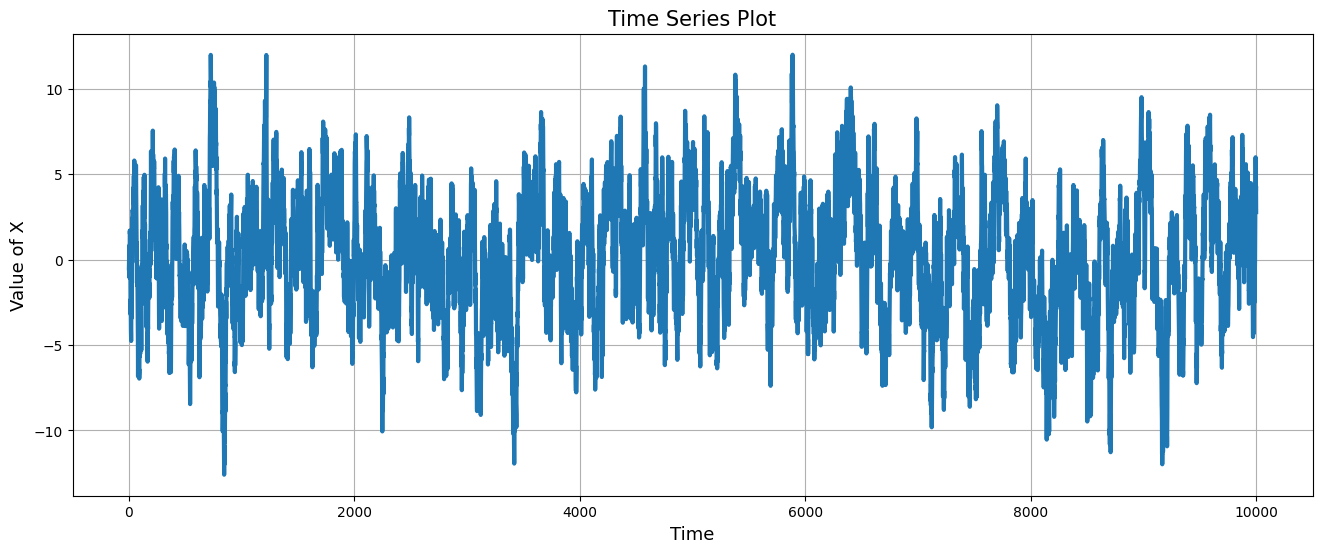

In [17]:
def plot_series(X): 
    """ Plots the time series data X.
    
    Args:
        X (np.array): Time-series data
    """

    fig = plt.figure(figsize=(16, 6))
    plt.plot(X, linewidth=3)
    plt.title('Time Series Plot', fontsize=15)
    plt.xlabel('Time', fontsize=13)
    plt.ylabel('Value of X', fontsize=13)
    plt.grid()
    plt.show()

plot_series(X)

In [18]:
def plot_graphs(ar_params=None, X=None, figsize=(10, 5), get_X=False):
    """ Plot ACF and PACF graphs
    
        Takes in time series data and plots the ACF and PACF graphs for the 
        series. When the time series is not provided, it generates the time 
        series using ar params and plots the graphs.

    Args:
        X (np.array): Time series data
        ar_params (np.array): AR parameters - (phi1, phi2, ...)
        figsize (tuple): Size for the figure
        get_X (bool): If True returns the generated function X 
    
    """
    
    if X is None:
        ar = np.r_[1, -ar_params] 
        ar_process = ArmaProcess(ar, ma=[1]) 
        X = ar_process.generate_sample(nsample=10000) 

    fig = plt.figure(figsize=figsize)
    fig.subplots_adjust(hspace=0.45)
    
    title = 'Autocorrelation for AR model ~ {}'.format(str(ar_params))
    
    ax = fig.add_subplot(211)
    sm.graphics.tsa.plot_acf(X, ax=ax)
    ax.set_title(title, fontsize=14)
    
    title = 'Partial ' + title
    ax = fig.add_subplot(212)
    sm.graphics.tsa.plot_pacf(X, ax=ax)
    ax.set_title(title, fontsize=14)
    plt.show()

    if get_X:
        return X

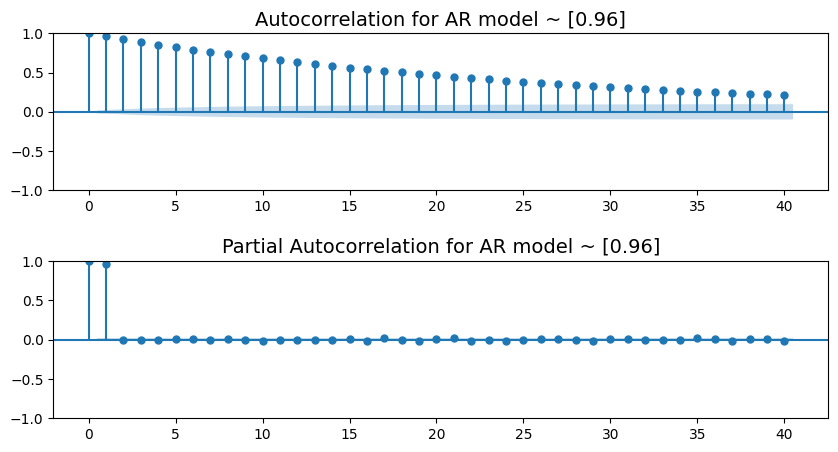

In [19]:
plot_graphs(ar_params,X)

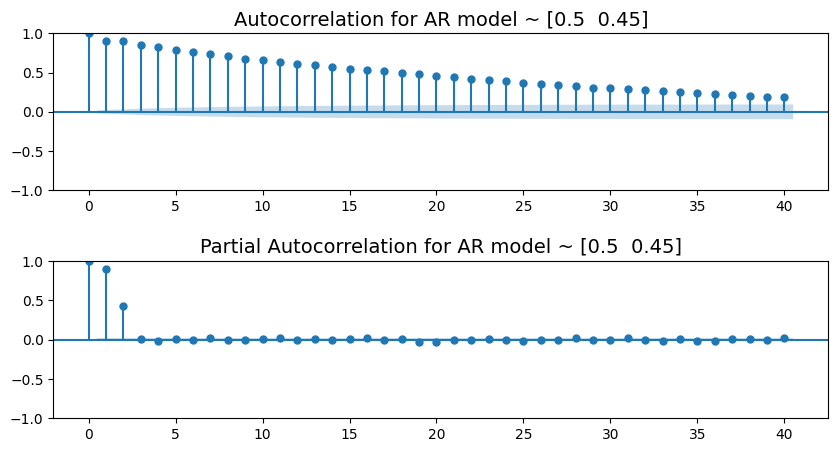

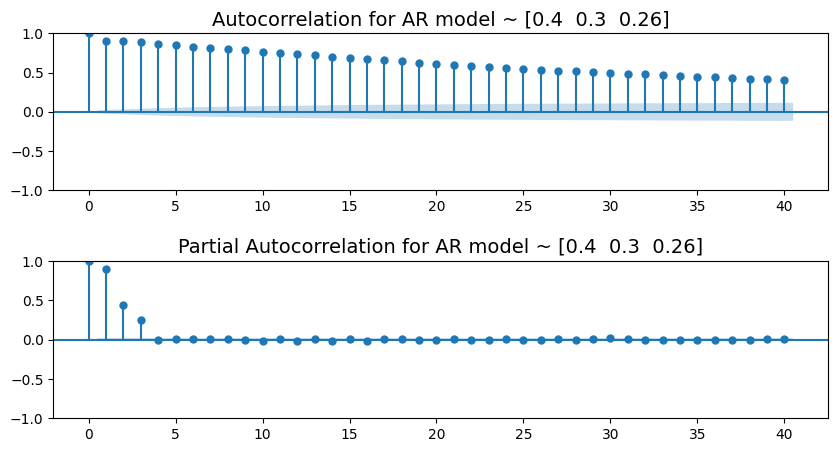

In [20]:
ar_params1 = np.array([0.5,0.45])
arr_params2 = np.array([0.4,0.3,0.26])

plot_graphs(ar_params1)
X_3 = plot_graphs(arr_params2,get_X=True)

In [21]:
X_3

array([-0.71355254,  0.00325651, -0.04593207, ..., -0.23076169,
       -0.87506974,  0.29920435])

In [26]:
ar_order = 3
ma_order = 0
order = (ar_order,ma_order,0)

ar_model = ARIMA(X_3,order=order).fit()

In [27]:
ar_model.params

array([0.19793246, 0.39928795, 0.30938827, 0.25161581, 1.00678913])